# 1: Cell physiology
## This notebook shows the code and calculations used to determine:
### - Cell volume
### - Chlorophyll content (a and c)

(Table 1 in the manuscript)

In [1]:
## Required packages
import pandas as pd
import numpy as np
import csv
import math as m

## Cell volumes
Cell length and width were determined using the straight-line tool in ImageJ (Schindelin J, Rueden CT, Hiner MC & Eliceiri KW (2015) The ImageJ ecosystem: An open platform for biomedical image analysis. Mol Reprod Dev 82: 518–529)

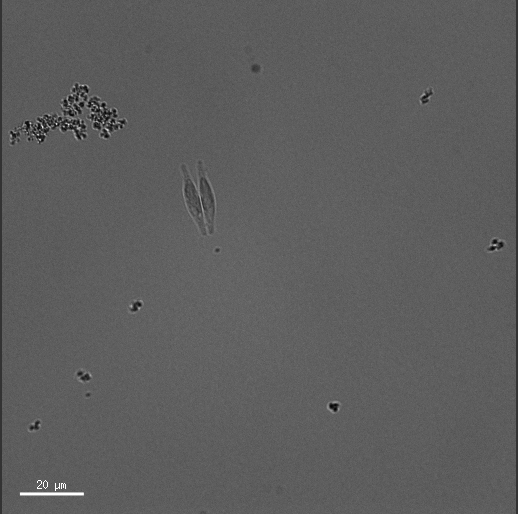

In [2]:
## Representative image of LL acclimated cells
from IPython.display import Image
Image("1_Pt_LL_acclim.jpg")

In [3]:
## Read in the cell dimensions
cell_dim = pd.read_csv('1_cell_measurements.csv')

## Pull out the High Light acclimated cell measurements
HL_vols = list()
HL_dims = cell_dim[['HL_len','HL_wid']]
## Iterate over the length and width measurements to determine the cell volumes
for i in HL_dims.index:
    ## Get the volume of the core ellipse
    ### Semi-major axis: (total length - 2x width)/2 
    smaj = (HL_dims.iloc[i]['HL_len']-2*HL_dims.iloc[i]['HL_wid'])/2
    ### Semi-minor axis: (width/2)
    smin = HL_dims.iloc[i]['HL_wid']/2
    ellipse = (4./3.)*np.pi*(smaj*(smin*smin))
    ### Get the volume of the cones    
    cones = (1./3.)*np.pi*(np.power((HL_dims.iloc[i]['HL_wid']/4),2)+((HL_dims.iloc[i]['HL_wid']/4)*1)+1)*(HL_dims.iloc[i]['HL_wid'])
    HL_vols.append(ellipse+(2*cones))

    
## Pull out the Low Light acclimated cell measurements
LL_vols = list()
LL_dims = cell_dim[['LL_len','LL_wid']]
LL_dims.dropna(inplace=True)
## Iterate over the length and width measurements to determine the cell volumes
for i in LL_dims.index:
    ## Get the volume of the core ellipse
    ### Semi-major axis: (total length - 2x width)/2 
    smaj = (LL_dims.iloc[i]['LL_len']-2*LL_dims.iloc[i]['LL_wid'])/2
    ### Semi-minor axis: (width/2)
    smin = LL_dims.iloc[i]['LL_wid']/2
    ellipse = (4./3.)*np.pi*(smaj*(smin*smin))\
    ### Get the volume of the cones    
    cones = (1./3.)*np.pi*(np.power((LL_dims.iloc[i]['LL_wid']/4),2)+((LL_dims.iloc[i]['LL_wid']/4)*1)+1)*(LL_dims.iloc[i]['LL_wid'])
    LL_vols.append(ellipse+(2*cones))
    
print("HL Mean: ", np.floor(np.mean(HL_vols)))
print("HL Std: ", np.floor(np.std(HL_vols)))

print("LL Mean: ", np.floor(np.mean(LL_vols)))
print("LL Std: ", np.floor(np.std(LL_vols)))

HL Mean:  202.0
HL Std:  43.0
LL Mean:  184.0
LL Std:  47.0


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Chlorophyll content

Based on Ritchie 2008 PHOTOSYNTHETICA 46 (1): 115-126, 2008

5 mL of cells were concentrated and resuspended in 2 mL MeOH

So [chl] in ug/cell = ug_chl/mL * 2 mL MeOH / (1e6 * total cells)

In [4]:
## Cell densities (total cells, in millions)
# High light acclimated
chl_cell={'Pt_chl_F1' : 52.5,# High light acclimated
    'Pt_chl_F2' : 44.0, # High light acclimated 
    'Pt_chl_F3' : 38.7, # High light acclimated
    'Pt_chl_F4' : 66.0, # High light acclimated
    'Pt_chl_F5' : 22.0, # Low light acclimated
    'Pt_chl_F6' : 21.5, # Low light acclimated
    'Pt_chl_F7' : 26.0} # Low light acclimated

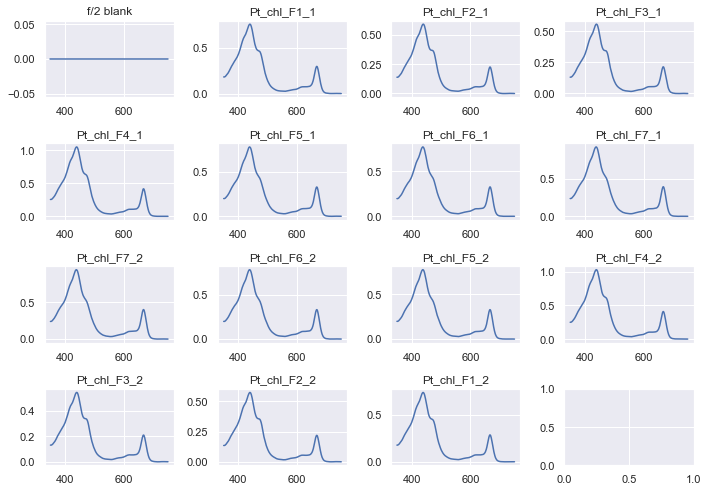

In [5]:
## Read in and plot the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read in the blank subtracted data
Pt_chl = pd.read_excel('1_Cell_Physiology.xlsx',sheet_name='Chlorophyll')
x = Pt_chl.wavelength.values
fig, axes = plt.subplots(4, 4, figsize=(10, 7))
blank = Pt_chl['f/2 blank'].values

samples = [i for i in Pt_chl.columns if i != 'wavelength']
start = 1
for s in samples:
    # get values for the sample
    vals = [float(val) for val in Pt_chl[s].values]
   
    plt.subplot(4,4,start)
    plt.plot(x,vals,'b')
    plt.title(s)   
    start = start+1
    
plt.tight_layout()
plt.show()

## The plots above are total absorbace (A) per cm pathlength.
### As the pathlength was 1 cm, the values are total absorbance.
### Next, we will use the chlorophyll extinction coefficients to determine concentration

In [6]:
## Define functions for determining chlorophlly a,c, total
def calc_chla(sample_ID,chl_DF):
    # Pull the absorbance data for the desired sample
    OD_list = [750,665,652,632]
    abs_values = dict()
    for o in OD_list:
        abs_values[o] = float(chl_DF[chl_DF['wavelength']==o][sample_ID].values[0])
        
    chla = (16.4351*(abs_values[665]-abs_values[750]))-(6.4151*(abs_values[652]-abs_values[750]))-(3.2416*(abs_values[632]-abs_values[750]))
    return chla

def calc_chlc(sample_ID,chl_DF):
    # Pull the absorbance data for the desired sample
    OD_list = [750,665,652,632]
    abs_values = dict()
    for o in OD_list:
        abs_values[o] = float(chl_DF[chl_DF['wavelength']==o][sample_ID].values[0])
        
    chlc = (-1.5492*(abs_values[665]-abs_values[750]))-(12.8087*(abs_values[652]-abs_values[750]))+(34.2247*(abs_values[632]-abs_values[750]))
    return chlc

def calc_chl(sample_ID,chl_DF):
    # Pull the absorbance data for the desired sample
    OD_list = [750,665,652,632]
    abs_values = dict()
    for o in OD_list:
        abs_values[o] = float(chl_DF[chl_DF['wavelength']==o][sample_ID].values[0])
        
    total_chl = (1.0015*(abs_values[665]-abs_values[750]))+(12.9241*(abs_values[652]-abs_values[750]))+(27.9603*(abs_values[632]-abs_values[750]))
    return total_chl

In [7]:
## Calculate the chlorophyll content
### Units are grams chlorophyll per m3 of methanol

samples = [i for i in Pt_chl.columns if i != 'wavelength']
chl_values = pd.DataFrame(index=['Chl_total','Chla','Chlc'])

for s in samples:
    chl_values[s] = [calc_chl(s,Pt_chl),calc_chla(s,Pt_chl),calc_chlc(s,Pt_chl)]

print(chl_values)

           f/2 blank  Pt_chl_F1_1  Pt_chl_F2_1  Pt_chl_F3_1  Pt_chl_F4_1  \
Chl_total        0.0     3.856651     2.986155     2.864568     5.538572   
Chla             0.0     3.754774     2.883372     2.727964     5.294358   
Chlc             0.0     0.592678     0.481012     0.466127     0.926704   

           Pt_chl_F5_1  Pt_chl_F6_1  Pt_chl_F7_1  Pt_chl_F7_2  Pt_chl_F6_2  \
Chl_total     4.427625     4.357285     5.301262     5.472550     4.487749   
Chla          4.152115     4.117365     5.017572     5.098598     4.195971   
Chlc          0.799204     0.763853     0.937439     0.991761     0.823269   

           Pt_chl_F5_2  Pt_chl_F4_2  Pt_chl_F3_2  Pt_chl_F2_2  Pt_chl_F1_2  
Chl_total     4.425339     5.374422     2.782806     2.830736     3.750790  
Chla          4.142803     5.196014     2.662481     2.783852     3.615645  
Chlc          0.778956     0.862458     0.451893     0.427797     0.607009  


## These values are in units of g m^-3 MeOH
### g/m3 converted to pg/mL : 1e12/1e6 = 1e6
### Next, normalize by total cells and multiply by 2 since there is 2 mL of MeOH

In [8]:
## Take the flask cell data from the above dictionary
for fl,cell in chl_cell.items():
    df_cols = [col for col in chl_values if fl in col] # Get the right column
    for c in df_cols:
        temp_data = chl_values[c].values/(cell*1e6)*2*1e6 # Normalize by cell count, multiply by 2mL MeOH, convert g/m3 to pg/cell
        chl_values[c]=temp_data # Write to DataFrame
        

In [9]:
## Print the mean and std for HL and LL acclimated cells
### Separate the HL and LL flasks
HL_fl = ['F1','F2','F3','F4'] ## HL flasks
LL_fl = ['F5','F6','F7'] ## LL flasks

HL_col = []
for f in HL_fl:
    HL_col= HL_col+[c for c in chl_values if f in c]

## Separate the DataFrame    
HL_chl = chl_values[HL_col]

print('HL mean chla: ',np.around(HL_chl.loc['Chla'].mean(),3), 'picograms per cell')
print('HL std chla: ',np.around(HL_chl.loc['Chla'].std(),3), 'picograms per cell')
print('HL mean chlc: ',np.around(HL_chl.loc['Chlc'].mean(),3), 'picograms per cell')
print('HL std chlc: ',np.around(HL_chl.loc['Chlc'].std(),3), 'picograms per cell')

LL_col = []
for f in LL_fl:
    LL_col= LL_col+[c for c in chl_values if f in c]

## Separate the DataFrame
LL_chl = chl_values[LL_col]

print('LL mean chla: ',np.around(LL_chl.loc['Chla'].mean(),3), 'picograms per cell')
print('LL std chla: ',np.around(LL_chl.loc['Chla'].std(),3), 'picograms per cell')
print('LL mean chlc: ',np.around(LL_chl.loc['Chlc'].mean(),3), 'picograms per cell')
print('LL std chlc: ',np.around(LL_chl.loc['Chlc'].std(),3), 'picograms per cell')

HL mean chla:  0.142 picograms per cell
HL std chla:  0.012 picograms per cell
HL mean chlc:  0.024 picograms per cell
HL std chlc:  0.003 picograms per cell
LL mean chla:  0.384 picograms per cell
LL std chla:  0.006 picograms per cell
LL mean chlc:  0.073 picograms per cell
LL std chlc:  0.003 picograms per cell
